<a href="https://colab.research.google.com/github/mangeshtate/Python-Collab-Notebook/blob/main/Building_a_Simple_FNN_for_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
data = pd.read_csv('crop_yield_data.xls')
data.head()

,temperature,humidity,rainfall,soil_quality,fertilizer_used,crop_yield
0,25,60,50,7,200,2000
1,28,65,60,6,220,2200
2,24,58,40,8,180,1800
3,26,62,55,7,210,2100
4,22,59,45,6,190,1900


In [ ]:
# Define features (independent variables)
X = data[['temperature', 'humidity', 'rainfall', 'soil_quality', 'fertilizer_used']].values

# Define target (dependent variable)
y = data[['crop_yield']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.layers import Input # Import Input layer

# Build the neural network (with Input layer)
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # define input explicitly
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4507936.5000 - mae: 2112.8857 - val_loss: 5301834.0000 - val_mae: 2300.3916
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 4507732.5000 - mae: 2112.8374 - val_loss: 5301659.5000 - val_mae: 2300.3545
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 4507530.5000 - mae: 2112.7898 - val_loss: 5301485.0000 - val_mae: 2300.3171
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 4507334.0000 - mae: 2112.7432 - val_loss: 5301328.0000 - val_mae: 2300.2834
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 4507140.0000 - mae: 2112.6970 - val_loss: 5301178.0000 - val_mae: 2300.2515
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 4506951.0000 - mae: 2112.6521 - val_loss: 5301030.5000 - val_mae: 2300.2197
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 4506764.0000 - mae: 2112.6074 - val_loss: 5300883.0000 - val_mae: 2300.1885
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 4506582.50

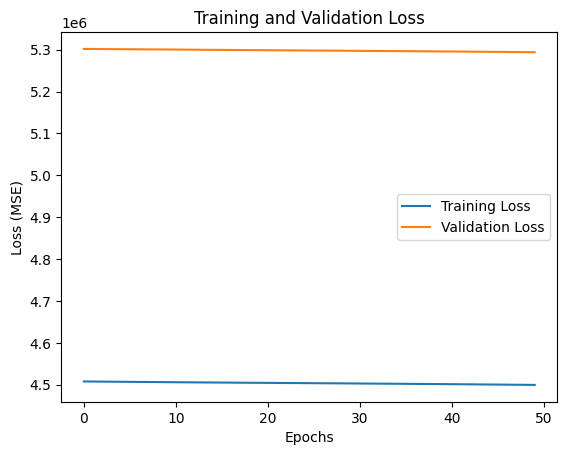

In [ ]:

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


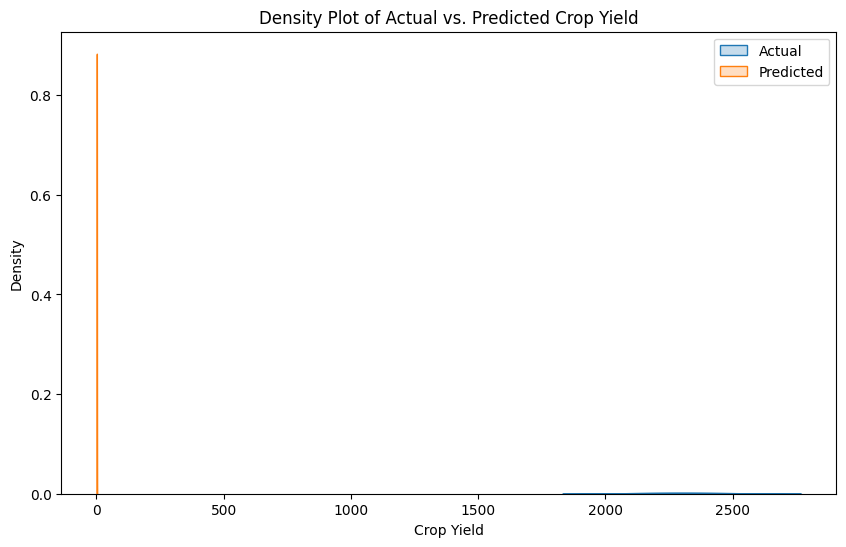

In [ ]:
import seaborn as sns

y_pred = model.predict(X_test)

plot_data = pd.DataFrame({'Actual Crop Yield': y_test.flatten(), 'Predicted Crop Yield': y_pred.flatten()})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=plot_data, x='Actual Crop Yield', label='Actual', fill=True)
sns.kdeplot(data=plot_data, x='Predicted Crop Yield', label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted Crop Yield')
plt.xlabel('Crop Yield')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
x = data[['temperature','humidity','rainfall','soil_quality','fertilizer_used']].values
y = data['crop_yield'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Input
model = Sequential([
Input(shape=(x_train.shape[1],)),
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4162384.2500 - mae: 2028.2579 - val_loss: 4560124.0000 - val_mae: 2133.3184
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 4142032.2500 - mae: 2023.2948 - val_loss: 4536928.5000 - val_mae: 2127.8894
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 4121602.0000 - mae: 2018.2997 - val_loss: 4513660.0000 - val_mae: 2122.4294
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 4101090.2500 - mae: 2013.2721 - val_loss: 4490361.5000 - val_mae: 2116.9475
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 4080605.2500 - mae: 2008.2345 - val_loss: 4467308.0000 - val_mae: 2111.5078
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 4060168.2500 - mae: 2003.1923 - val_loss: 4444632.0000 - val_mae: 2106.1392
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 4039945.0000 - mae: 1998.1832 - val_loss: 4422112.5000 - val_mae: 2100.7988
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 40

In [ ]:

predictions = model.predict(x_test)
display(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[2300.1313],
       [2153.1858]], dtype=float32)

In [ ]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

Test Loss: 6082.6592
Test MAE: 73.3414


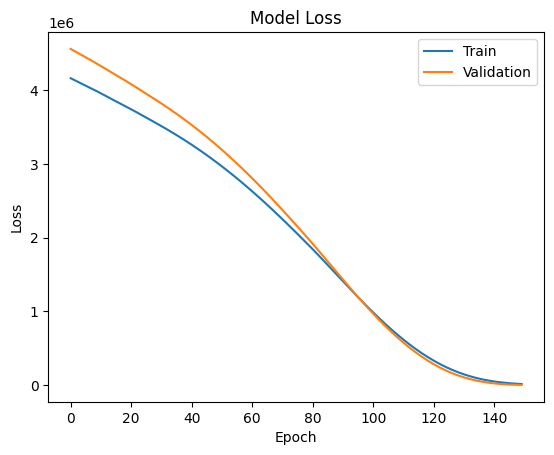

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

Text(0, 0.5, 'Density')

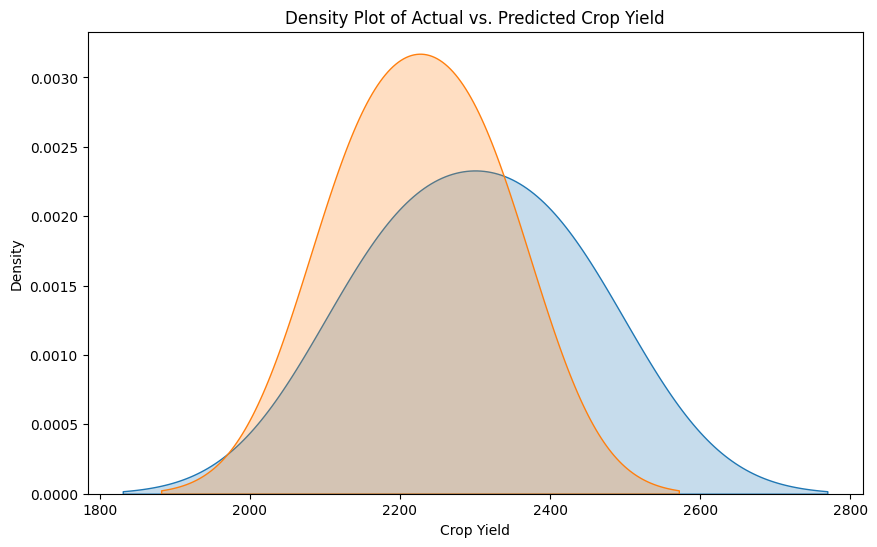

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test.flatten(), label='Actual Crop Yield', fill=True)
sns.kdeplot(y_pred.flatten(), label='Predicted Crop Yield', fill=True)
plt.title('Density Plot of Actual vs. Predicted Crop Yield')
plt.xlabel('Crop Yield')
plt.ylabel('Density')

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(4,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])